In [27]:
%pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import nltk
nltk.download('punkt')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inspiron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [30]:
df = pd.read_csv(r'C:\Users\Inspiron\Desktop\data analyst projects\Social Media Sentiments\data\sentimentdataset.csv')
df.head()

,ID,Entity,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,1,Borderlands,Enjoying a beautiful day at the park! ...,Positive,15-01-2023 12:30,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,2,CallOfDutyBlackopsColdWar,Traffic was terrible this morning. ...,Negative,15-01-2023 8:45,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,3,Amazon,Just finished an amazing workout! 💪 ...,Positive,15-01-2023 15:45,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,4,Overwatch,Excited about the upcoming weekend getaway! ...,Positive,15-01-2023 18:20,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,5,Xbox(Xseries),Trying out a new recipe for dinner tonight. ...,Neutral,15-01-2023 19:55,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19


In [31]:
# basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         732 non-null    int64 
 1   Entity     732 non-null    object
 2   Text       732 non-null    object
 3   Sentiment  732 non-null    object
 4   Timestamp  732 non-null    object
 5   User       732 non-null    object
 6   Platform   732 non-null    object
 7   Hashtags   732 non-null    object
 8   Retweets   732 non-null    int64 
 9   Likes      732 non-null    int64 
 10  Country    732 non-null    object
 11  Year       732 non-null    int64 
 12  Month      732 non-null    int64 
 13  Day        732 non-null    int64 
 14  Hour       732 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 85.9+ KB


In [32]:
print(df.columns)

Index(['ID', 'Entity', 'Text', 'Sentiment', 'Timestamp', 'User', 'Platform',
       'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day',
       'Hour'],
      dtype='object')


In [33]:
# Check Data Dimensions
df.shape

(732, 15)

In [34]:
df.dtypes

ID            int64
Entity       object
Text         object
Sentiment    object
Timestamp    object
User         object
Platform     object
Hashtags     object
Retweets      int64
Likes         int64
Country      object
Year          int64
Month         int64
Day           int64
Hour          int64
dtype: object

In [35]:
# check for missing values
df.isnull().sum()

ID           0
Entity       0
Text         0
Sentiment    0
Timestamp    0
User         0
Platform     0
Hashtags     0
Retweets     0
Likes        0
Country      0
Year         0
Month        0
Day          0
Hour         0
dtype: int64

In [36]:
# dropping the rows with content missing values
df.dropna(subset = ['Text'],inplace=True)

In [8]:
# Count the total number of duplicate rows
total_duplicates = df[df.duplicated(keep='first')].shape[0]

print("Total duplicate rows:", total_duplicates)

Total duplicate rows: 0


In [37]:
# Drop duplicate rows
df.drop_duplicates(keep='first', inplace=True)

# Reset the index after dropping duplicates
df.reset_index(drop=True, inplace=True)

In [38]:
# replace irrelevant to neutral
df['Sentiment'] = df['Sentiment'].replace('Irrelevant', 'Neutral')

In [39]:
df.Sentiment.unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

In [40]:
df.Entity.unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'Google', 'Facebook', 'Microsoft', 'ApexLegends',
       'FIFA', 'Dota3', 'Dota4', 'Dota5', 'Dota6', 'Dota7', 'Dota8',
       'Dota9', 'Dota10', 'Dota11', 'Dota12', 'Dota13', 'Dota14',
       'Dota15', 'Dota16', 'Dota17', 'Dota18', 'Dota19', 'Dota20',
       'Dota21', 'Dota22', 'Dota23', 'Dota24', 'Dota25', 'Dota26',
       'Dota27', 'Dota28', 'Dota29', 'Dota30', 'Dota31', 'Dota32',
       'Dota33', 'Dota34', 'Dota35', 'Dota36', 'Dota37', 'Dota38',
       'Dota39', 'Dota40', 'Dota41', 'Dota42', 'Dota43', 'Dota44',
       'Dota45', 'Dota46', 'Dota47', 'Dota48', 'Dota49', 'Dota50',
       'Dota51', 'Dota52', 'Dota53'], dtype=object)

In [42]:
print(df['Platform'].unique())

[' Twitter  ' ' Instagram ' ' Facebook ' ' Twitter ']


In [43]:
# Strip whitespace
df['Sentiment'] = df['Sentiment'].astype(str).str.strip()

# Optional: lowercase or title-case normalization
df['Sentiment'] = df['Sentiment'].str.title()

# Check unique sentiments
print(df['Sentiment'].value_counts())

Sentiment
Positive          45
Joy               44
Excitement        37
Contentment       19
Neutral           18
                  ..
Lostlove           1
Emotionalstorm     1
Suffering          1
Bittersweet        1
Intrigue           1
Name: count, Length: 191, dtype: int64


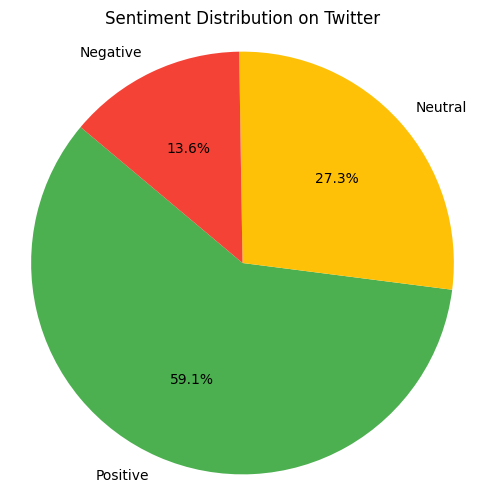

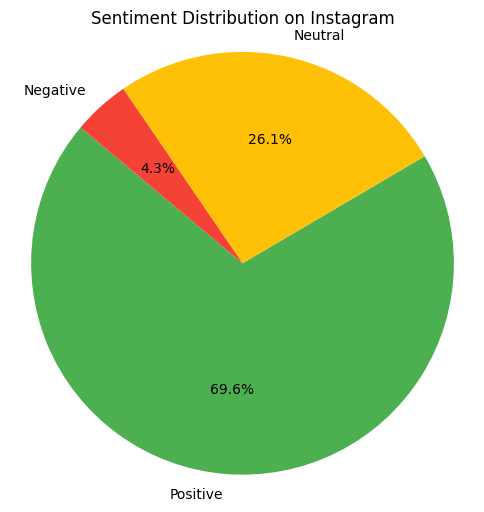

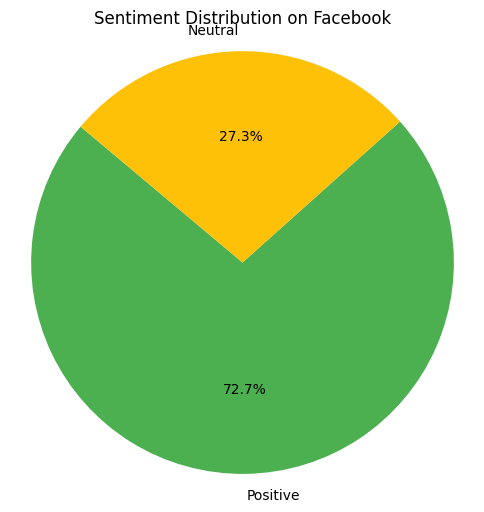

In [44]:
import matplotlib.pyplot as plt

# Clean columns
df['Platform'] = df['Platform'].astype(str).str.strip().str.title()
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.title()

# Keep only these three sentiments
main_sentiments = ['Positive', 'Negative', 'Neutral']

platforms = df['Platform'].unique()

for platform in platforms:
    # Filter data for the current platform
    platform_data = df[df['Platform'] == platform]

    # Count only Positive, Negative, Neutral
    sentiment_counts = platform_data[platform_data['Sentiment'].isin(main_sentiments)]['Sentiment'].value_counts()

    if sentiment_counts.sum() > 0:  # only show if there are sentiments
        plt.figure(figsize=(6, 6))
        plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140,
                colors=['#4CAF50','#FFC107', '#F44336'])  # Green, Red, Yellow
        plt.title(f"Sentiment Distribution on {platform}")
        plt.axis('equal')
        plt.show()
    else:
        print(f"No Positive/Negative/Neutral data found for {platform}")

C:\Users\Inspiron\AppData\Local\Temp\ipykernel_20672\2151777722.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette="viridis")


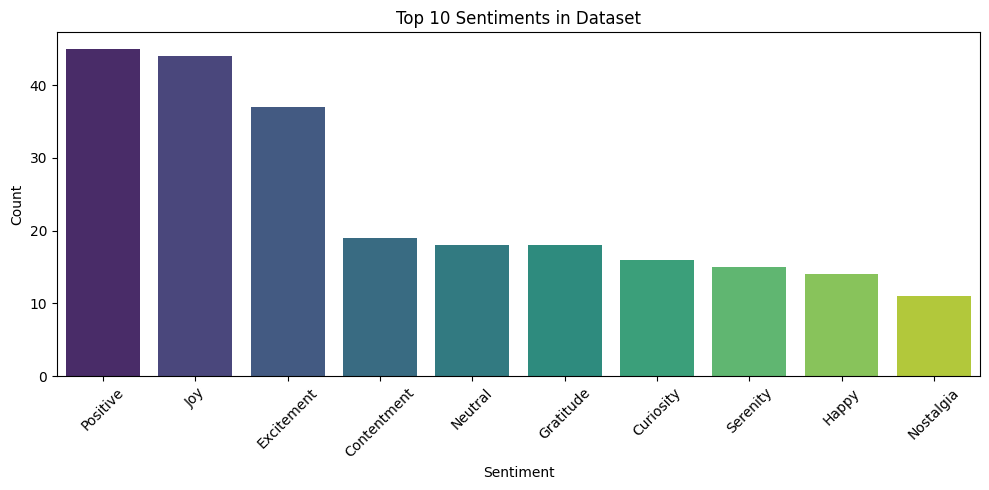

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 most frequent sentiments
top_sentiments = df['Sentiment'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_sentiments.index, y=top_sentiments.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Top 10 Sentiments in Dataset")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

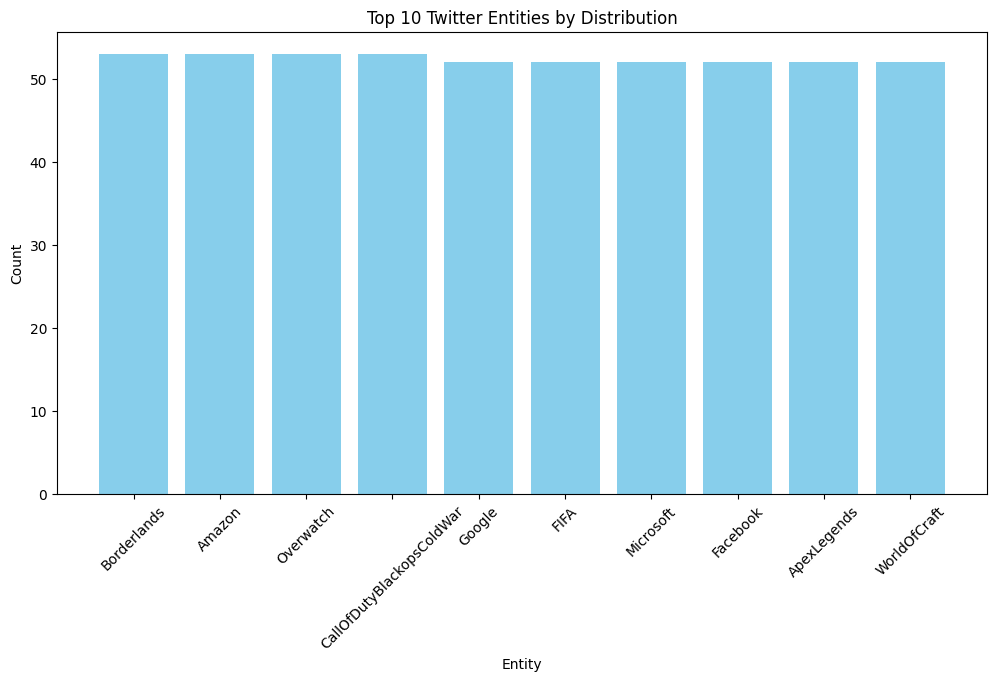

In [46]:
# Calculate the distribution of entities
entity_distribution = df['Entity'].value_counts()

# Select the top 10 entities
top_10_entities = entity_distribution.head(10)

# Create a bar chart for the top 10 entities
plt.figure(figsize=(12, 6))
plt.bar(top_10_entities.index, top_10_entities.values, color='skyblue')
plt.title('Top 10 Twitter Entities by Distribution')
plt.xlabel('Entity')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the bar chart
plt.show()

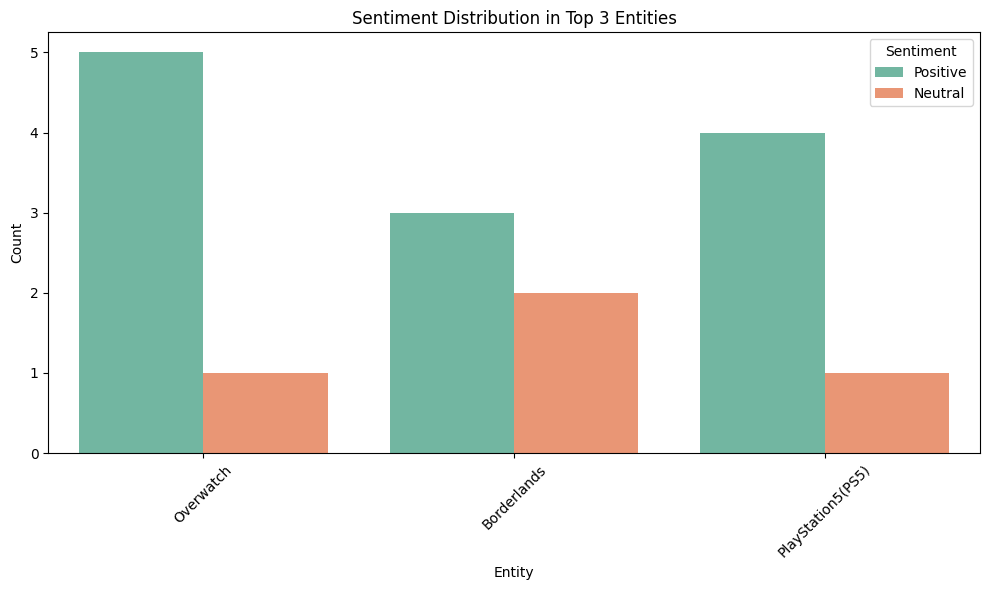

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Allowed sentiments
allowed_sentiments = ['positive', 'negative', 'neutral']

# Step 2: Filter dataframe for allowed sentiments only
df_filtered = df[df['Sentiment'].str.lower().isin(allowed_sentiments)]

# Step 3: Get top 3 entities
top_entities = df_filtered['Entity'].value_counts().head(3).index

# Step 4: Filter again for top 3 entities
df_top_3 = df_filtered[df_filtered['Entity'].isin(top_entities)]

# Step 5: Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_3, x='Entity', hue='Sentiment', order=top_entities, palette='Set2')
plt.title('Sentiment Distribution in Top 3 Entities')
plt.xlabel('Entity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


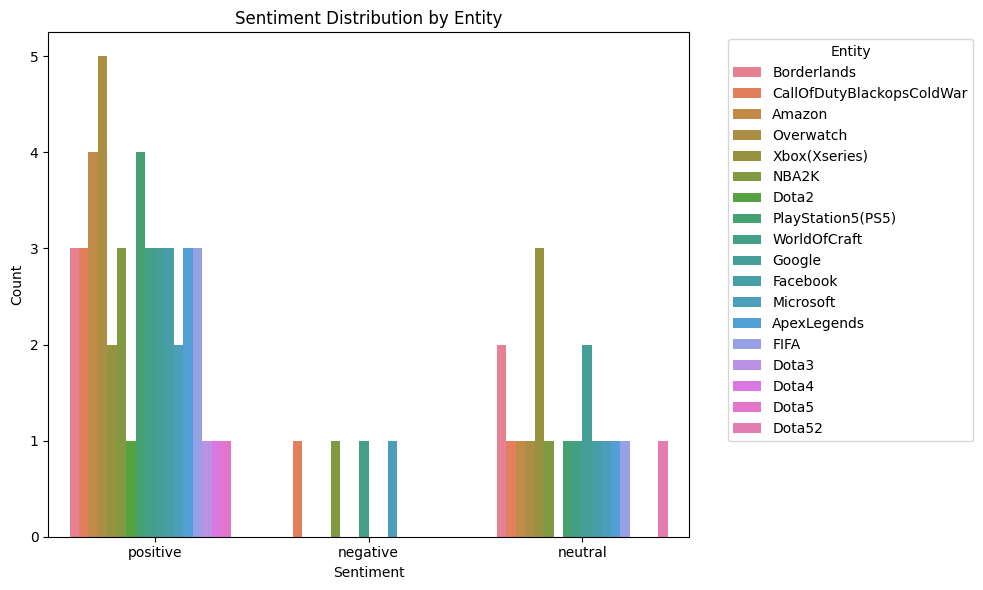

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean sentiment values (remove spaces, lowercase)
df['Sentiment'] = df['Sentiment'].str.strip().str.lower()

# Allowed sentiments
allowed_sentiments = ['positive', 'negative', 'neutral']

# Filter DataFrame
filtered_df = df[df['Sentiment'].isin(allowed_sentiments)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_df, x='Sentiment', hue='Entity', order=allowed_sentiments)
plt.title("Sentiment Distribution by Entity")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

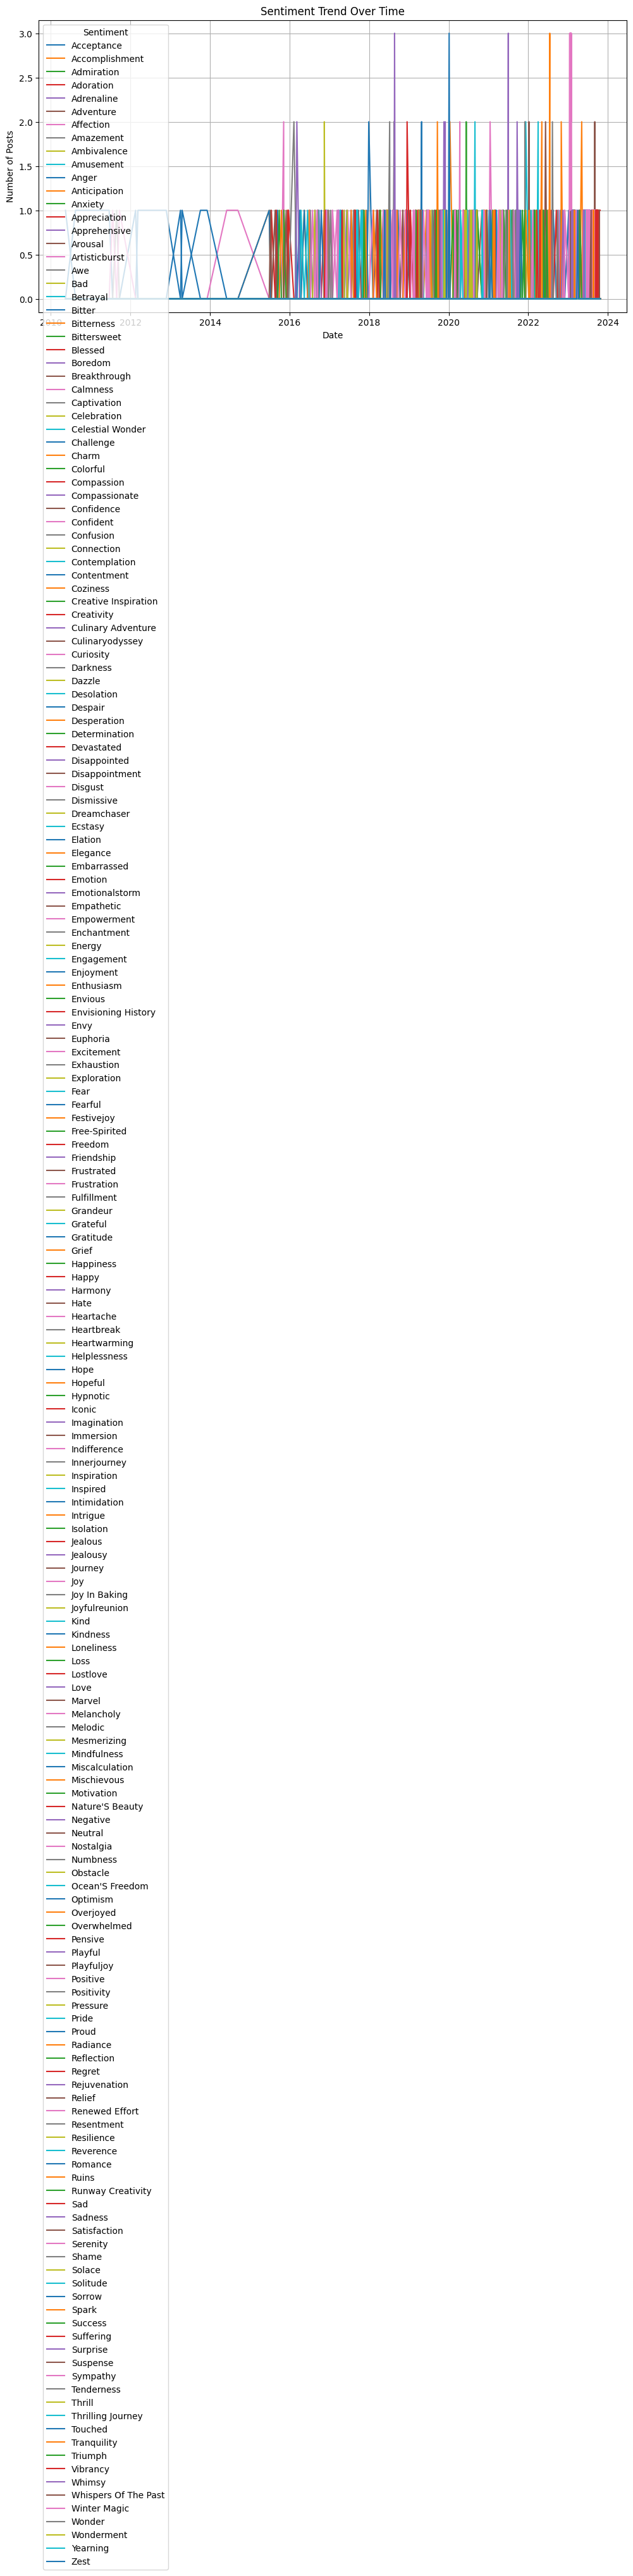

In [33]:
import matplotlib.pyplot as plt

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Date'] = df['Timestamp'].dt.date

sentiment_trend = df.groupby(['Date', 'Sentiment']).size().unstack().fillna(0)

sentiment_trend.plot(kind='line', figsize=(12, 6), title="Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.grid()
plt.show()

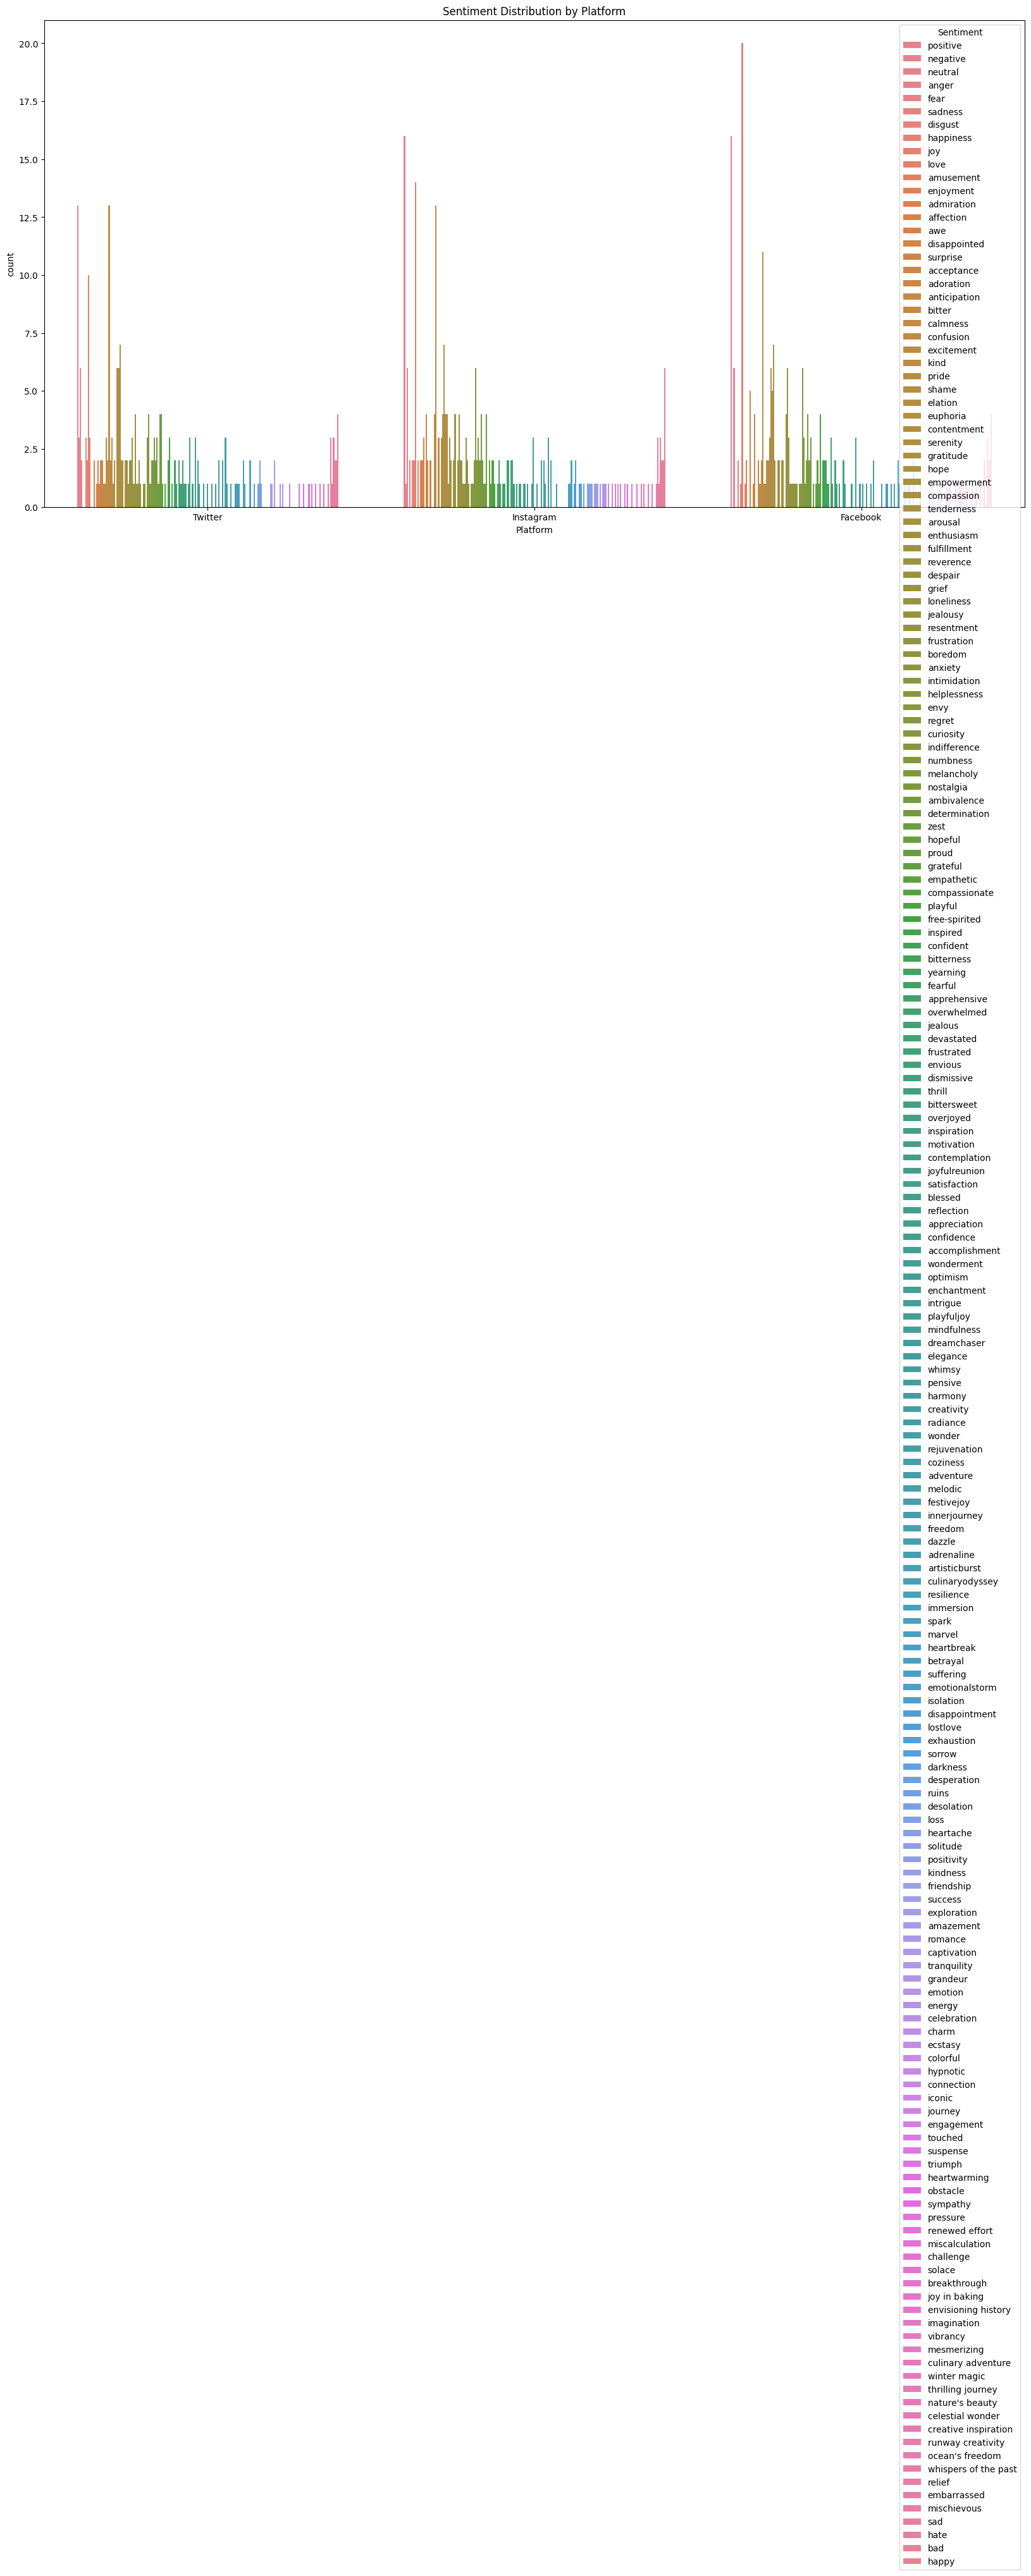

In [53]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Platform', hue='Sentiment')
plt.title("Sentiment Distribution by Platform")
plt.show()

C:\Users\Inspiron\AppData\Local\Temp\ipykernel_20672\2739765256.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


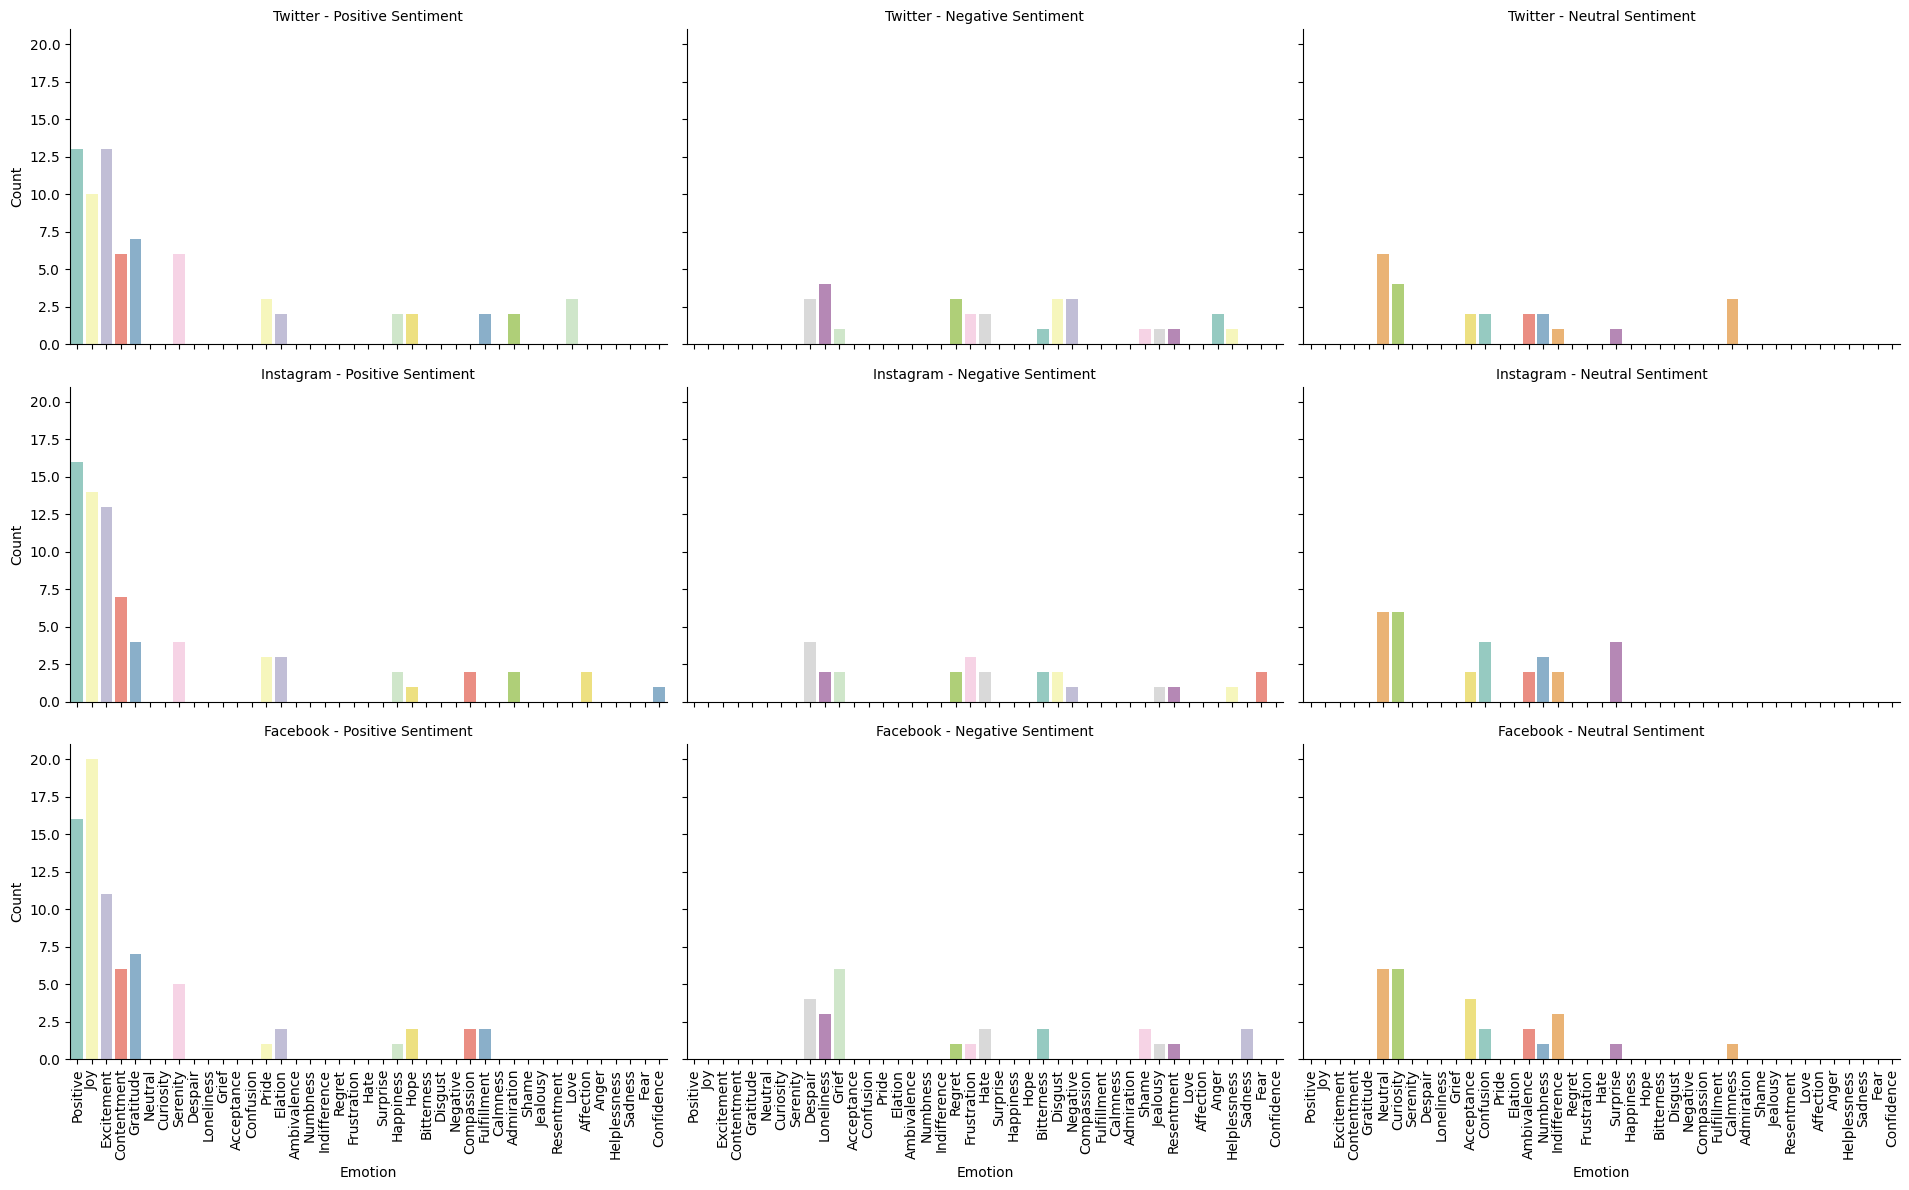

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean columns
df['Platform'] = df['Platform'].astype(str).str.strip().str.title()
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()

# Define emotion groups
positive_emotions = ['positive', 'joy', 'love', 'happiness', 'gratitude', 'hope', 'affection', 'admiration',
                     'pride', 'contentment', 'elation', 'fulfillment', 'serenity', 'compassion', 'confidence', 'excitement']

negative_emotions = ['negative', 'anger', 'sadness', 'fear', 'shame', 'disgust', 'despair', 'frustration', 'grief',
                     'regret', 'helplessness', 'loneliness', 'jealousy', 'bitterness', 'hate', 'resentment']

neutral_emotions = ['neutral', 'confusion', 'acceptance', 'surprise', 'curiosity', 'numbness', 'ambivalence',
                    'indifference', 'calmness']

# Group emotion into main sentiment
def classify_group(emotion):
    if emotion in positive_emotions:
        return 'Positive'
    elif emotion in negative_emotions:
        return 'Negative'
    elif emotion in neutral_emotions:
        return 'Neutral'
    else:
        return 'Other'

df['MainSentiment'] = df['Sentiment'].apply(classify_group)
df['Emotion'] = df['Sentiment'].str.title()  # For better label

# Filter only relevant sentiments
filtered_df = df[df['MainSentiment'].isin(['Positive', 'Negative', 'Neutral'])]

# Plot FacetGrid: Rows = Platform, Cols = Sentiment, Bars = Emotions
g = sns.catplot(
    data=filtered_df,
    kind='count',
    x='Emotion',
    col='MainSentiment',
    row='Platform',
    height=4,
    aspect=1.6,
    palette='Set3',
    order=filtered_df['Emotion'].value_counts().index  # optional: most frequent emotions first
)

g.set_titles("{row_name} - {col_name} Sentiment")
g.set_axis_labels("Emotion", "Count")
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


In [55]:
# lets Load NLTK stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess text with lemmatization and stopwords removal
def preprocess_text(text):
    # Remove special characters, numbers, and links
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing with lemmatization and stopwords removal to the 'Content' column
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inspiron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Inspiron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Inspiron\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [59]:
# loading vader to perform sentiment analysis
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer without specifying the lexicon file
sia = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

# Apply sentiment analysis to the 'Cleaned_Content' column
df['Sentiment_Score'] = df['Cleaned_Text'].apply(get_sentiment_scores)

# Categorize sentiment based on the compound score
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment categorization
df['Sentiment_Predicted'] = df['Sentiment_Score'].apply(categorize_sentiment)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Inspiron\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
df.to_csv("cleaned_social_sentiment.csv", index=False)

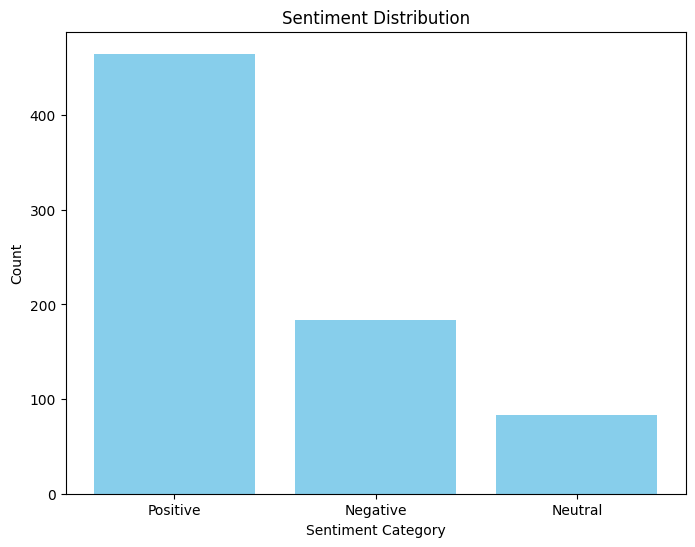

In [65]:
# lets Calculate the distribution of predicted sentiments
sentiment_distribution = df['Sentiment_Predicted'].value_counts()

# Create a bar chart for sentiment distribution
plt.figure(figsize=(8, 6))
plt.bar(sentiment_distribution.index, sentiment_distribution.values, color='skyblue')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Show the bar chart
plt.show()

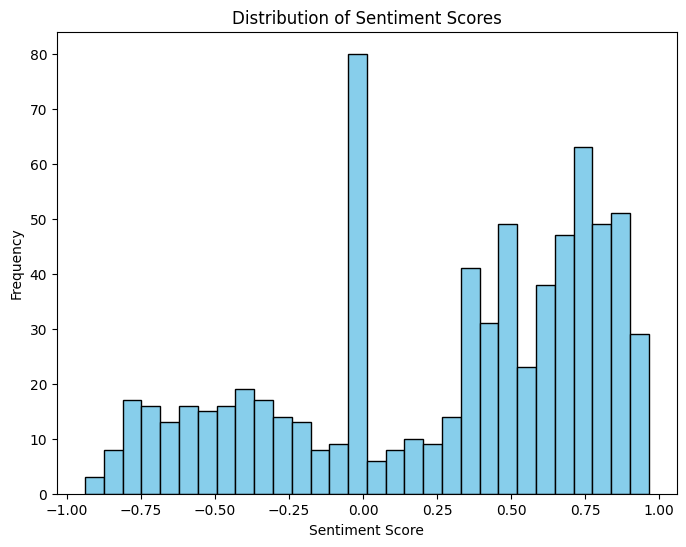

In [66]:
# Create a histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['Sentiment_Score'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Show the histogram
plt.show()

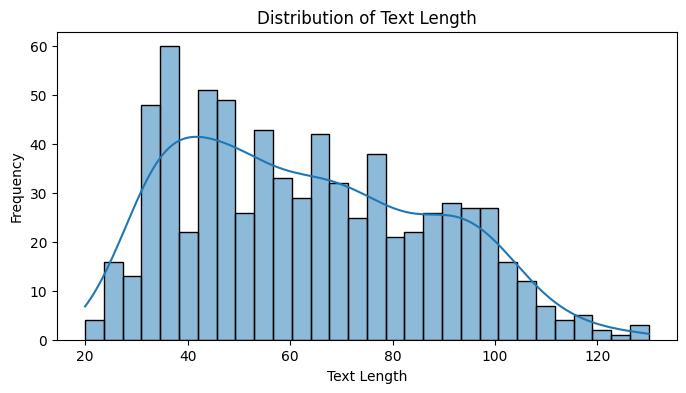

In [74]:
# for text length analysis
df['Text_Length'] = df['Cleaned_Text'].str.len()  # Calculate text length
plt.figure(figsize=(8, 4))
sns.histplot(df['Text_Length'], bins=30, kde=True)
plt.title("Distribution of Text Length")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

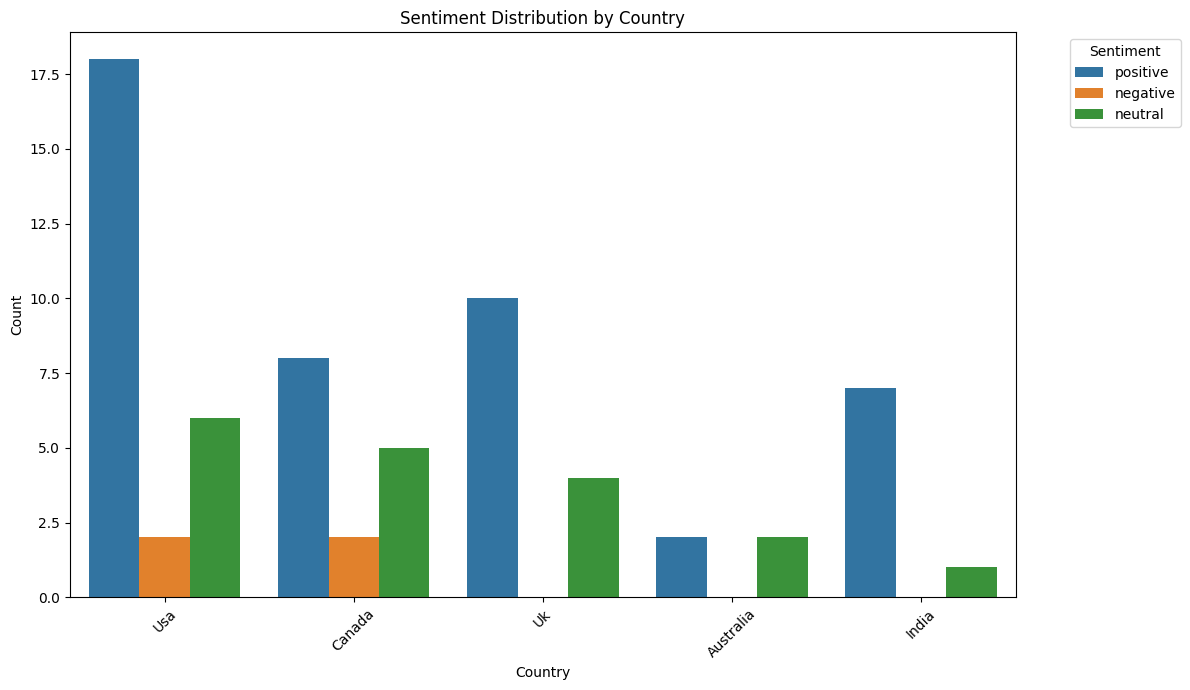

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Clean sentiment and country columns
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()
df['Country'] = df['Country'].astype(str).str.strip().str.title()

# Filter only the 3 main sentiments
df = df[df['Sentiment'].isin(['positive', 'negative', 'neutral'])]

# (Optional) Show only top 5 most frequent countries to keep the plot clean
top_countries = df['Country'].value_counts().head(5).index
df = df[df['Country'].isin(top_countries)]

# Plot
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Country', hue='Sentiment',
              hue_order=['positive', 'negative', 'neutral'])  # Ensure consistent sentiment order

# Styling
plt.title("Sentiment Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


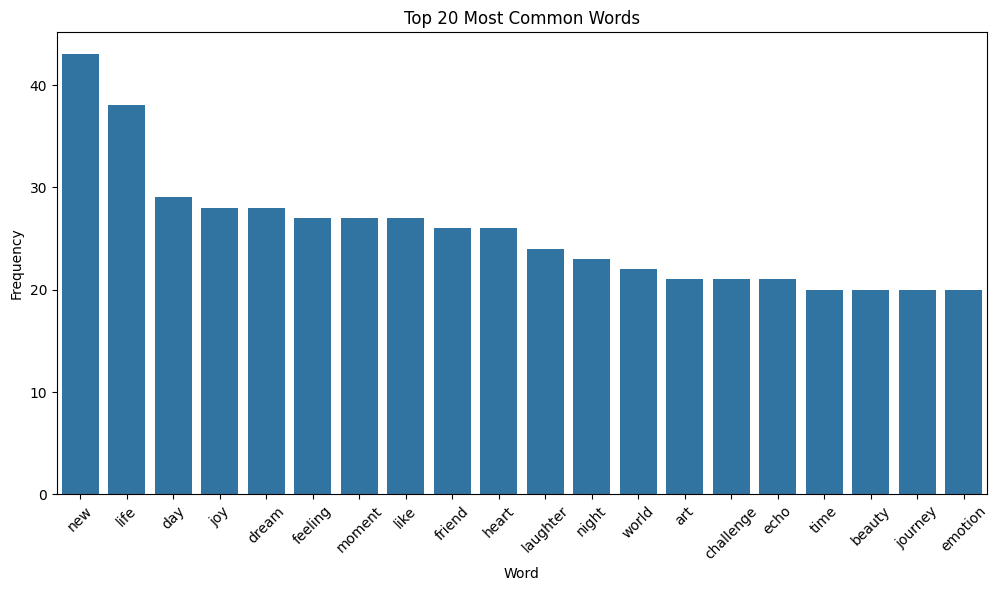

In [76]:
# word frequency analysis
from collections import Counter

words = ' '.join(df['Cleaned_Text']).split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Plot the top N most common words
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.title("Top 20 Most Common Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

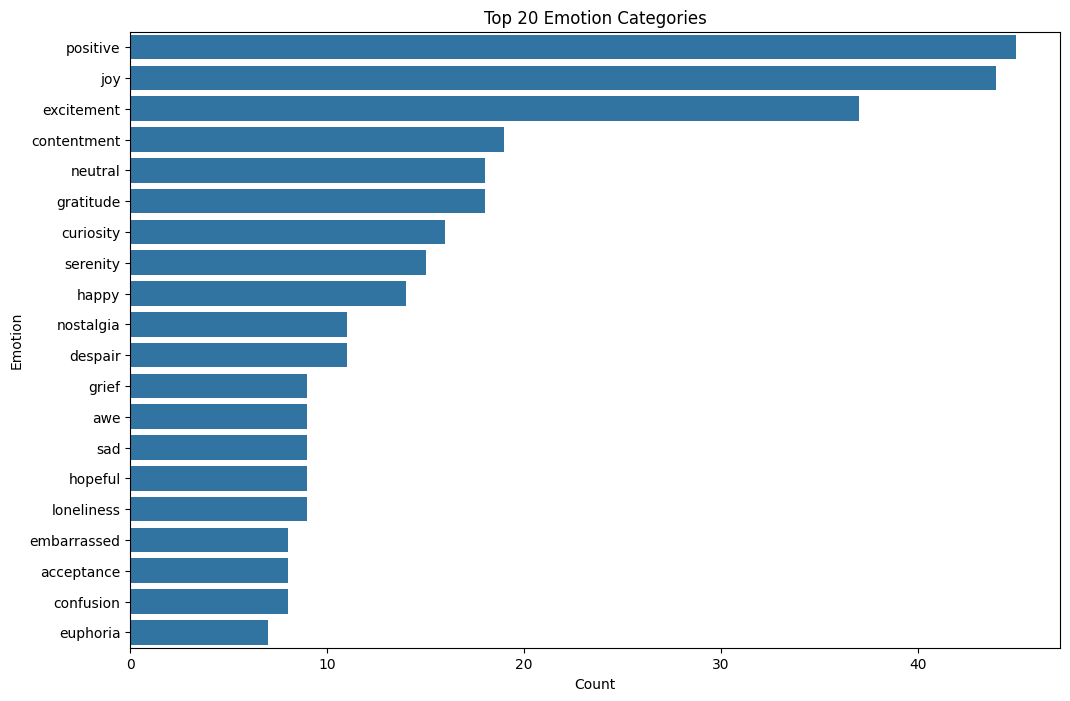

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Sentiment', order=df['Sentiment'].value_counts().index[:20])  # Top 20
plt.title("Top 20 Emotion Categories")
plt.xlabel("Count")
plt.ylabel("Emotion")
plt.show()

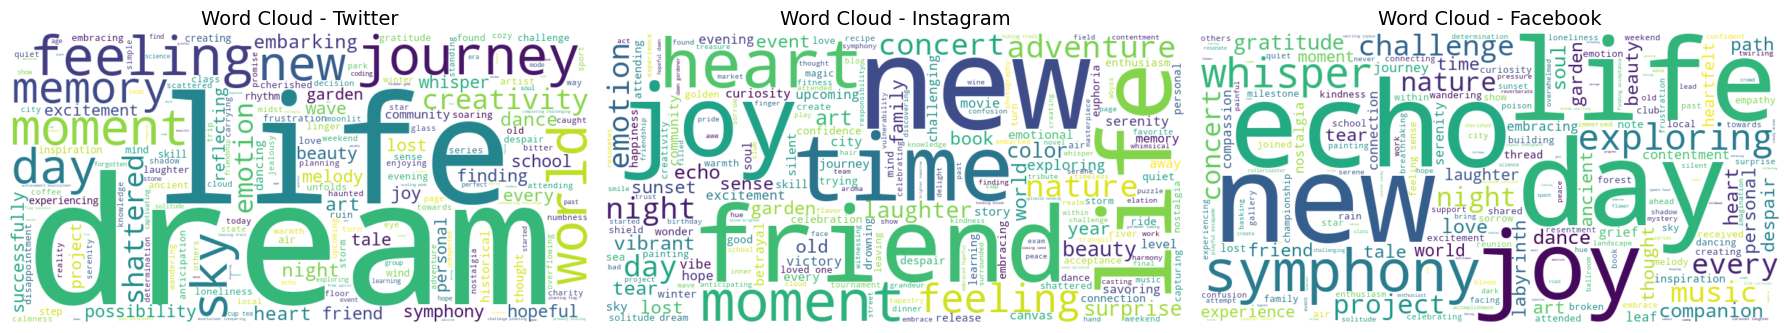

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Unique platforms in your dataset
platforms = df['Platform'].unique()

# Set figure size and layout
plt.figure(figsize=(18, 6))

# Loop through each platform and plot its word cloud
for i, platform in enumerate(platforms, 1):
    # Filter cleaned text for current platform
    text_data = ' '.join(df[df['Platform'] == platform]['Cleaned_Text'].dropna())

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

    # Plotting
    plt.subplot(1, len(platforms), i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {platform}", fontsize=14)

plt.tight_layout()
plt.show()

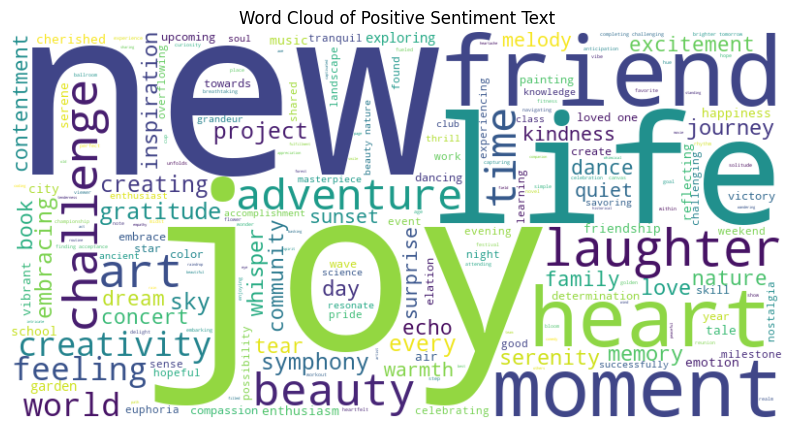

In [79]:
# Filter data for positive sentiment
positive_data = df[df['Sentiment_Predicted'] == 'Positive']

# Combine all lemmatized text for positive sentiment
positive_text_data = ' '.join(positive_data['Cleaned_Text'].dropna())

# Generate a word cloud for positive sentiment
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text_data)

# Display the word cloud for positive sentiment
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Positive Sentiment Text")
plt.show()


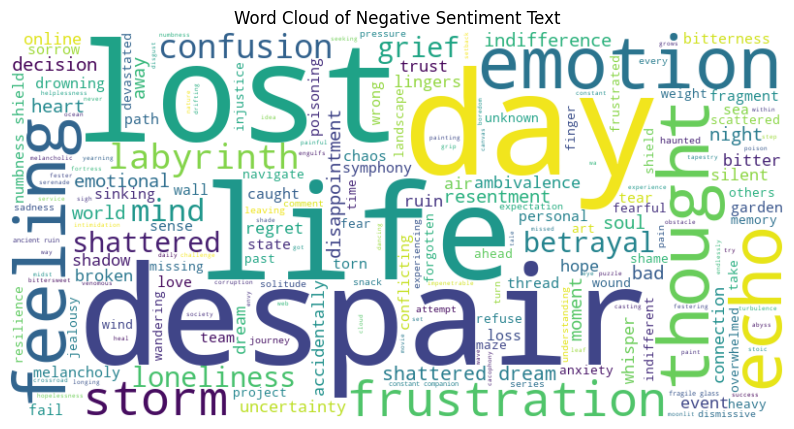

In [81]:
# lets Filter data for negative sentiment
negative_data = df[df['Sentiment_Predicted'] == 'Negative']

# Combine all lemmatized text for negative sentiment
negative_text_data = ' '.join(negative_data['Cleaned_Text'].dropna())

# Generate a word cloud for negative sentiment
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text_data)

# Display the word cloud for negative sentiment
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Negative Sentiment Text")
plt.show()


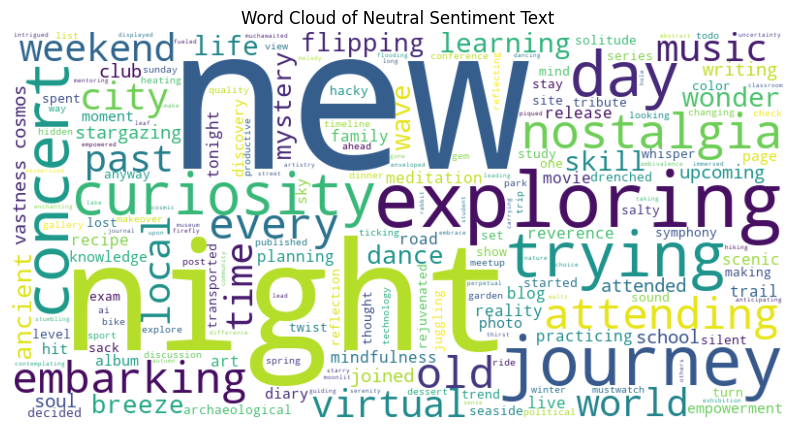

In [82]:
# lets Filter data for neutral sentiment
neutral_data = df[df['Sentiment_Predicted'] == 'Neutral']

# Combine all lemmatized text for neutral sentiment
neutral_text_data = ' '.join(neutral_data['Cleaned_Text'].dropna())

# Generate a word cloud for neutral sentiment
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(neutral_text_data)

# Display the word cloud for neutral sentiment
plt.figure(figsize=(10, 6))
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Neutral Sentiment Text")
plt.show()

In [83]:
# Assign the variables
X = df['Cleaned_Text']  # Features
y = df['Sentiment_Predicted']  # Target
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# converting the text data to numerical featurees

tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [85]:

# Initialize the model
model = LogisticRegression(max_iter=1000, solver='saga')

# Train the model
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000, solver='saga')

In [86]:
# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

    Negative       0.92      0.28      0.43        39
     Neutral       0.00      0.00      0.00        14
    Positive       0.70      1.00      0.82        94

    accuracy                           0.71       147
   macro avg       0.54      0.43      0.42       147
weighted avg       0.69      0.71      0.64       147



C:\Users\Inspiron\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Inspiron\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Inspiron\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [87]:
df.to_csv("final_cleaned_sentiments.csv", index=False)
